# DATA 601: Visualizing Hierarchical Data

**Learning Objectives**
- Wrangle and organize data for the purpose of visualization.
- Compare charts that visualize hierarchical data
- Produce interactive charts and plots. 

<!-- BEGIN QUESTION -->

## Imports

Please put all your imports in the cell below. For this exercise, `pandas` and `plotly express` will suffice.

In [2]:
# BEGIN SOLUTION

import pandas as pd
import plotly.express as px

# END SOLUTION

## Warmup
For this exercise, we'll use plotly express to produce two visualizations that show hierarchical information: Treemaps and Sunburst charts. Please read about these charts at the Data Viz Catalogue: [Treemap](https://datavizcatalogue.com/methods/treemap.html), [Sunburst chart](https://datavizcatalogue.com/methods/sunburst_diagram.html). 
Please also go through the documentation provided by plotly exprerss and familiarize yourself with the structure of the dataframe from which these charts are produced: [treemap](https://plotly.com/python/treemaps/), [sunburst chart](https://plotly.com/python/sunburst-charts/).

## Data
- Please download the [Corporate Energy Cosumption](https://data.calgary.ca/Environment/Corporate-Energy-Consumption/crbp-innf) dataset from the City of Calgary's open data portal.

## Tasks

- Familiarize yourself with the columns in the dataset and do some cleanup:
    - For this question, we'll work with the year 2019. You may discard the other years.
    - Observe that some of the cunsumption is reported in 'GJ' units while the rest is in 'kWh' units. For comparison, we need to convert everything to the same unit. Convert the `Total Consumption` reported in 'GJ' to 'kWh' by multiplying the relevant rows by 277.78.
- Use plotly express to produce a treemap showing the total consumption for the year 2019 with `Energy Description` at the first (top) level, followed by `Business Unit Desc` at the second level, followed by `FacilityName` at the third level. 
- Use plotly express to produce a sunburst chart showing the total consumption for the year 2019 with `Energy Description` at the first (innermost) level, followed by `Business Unit Desc` at the second level, followed by `FacilityName` at the third level.
- Compare and contrast the two visualizations and comment on the following:
  - If the task involved quickly identifying all the information at a particular level, which chart would be better?
  - Which chart makes more efficient use of screen space real estate?
  - Readability of information.


_Please do data reading and cleanup in the cell below._

In [3]:
# BEGIN SOLUTION
df = pd.read_csv('./Corporate_Energy_Consumption.csv', low_memory=False)

# retain only the information for 2019
year = 2019
df = df[df['Year'] == year]
df.drop(columns='Year', inplace=True)
#display( df.tail() )
#display( df.describe() )

# multiply the GJ entries by 277.78 so that everything is comparable

S = 277.78
mask = df['Unit'] == 'GJ'
df.loc[mask,'Total Consumption'] = df.loc[mask,'Total Consumption'] * S
df.loc[mask,'Unit'] = 'kWh'

display(df)
df.dtypes

# END SOLUTION

,Business Unit Desc,FacilityName,Site ID,FacilityAddress,Energy Description,Month,Total Consumption,Unit
60,Calgary Fire Department,ATCO VILLAGE (HOUSE),0020003498361,6015 23 AV SE,Electricity,Jan,654.00,kWh
61,Calgary Fire Department,ATCO VILLAGE (HOUSE),0020003498361,6015 23 AV SE,Electricity,Feb,543.00,kWh
62,Calgary Fire Department,ATCO VILLAGE (HOUSE),0020003498361,6015 23 AV SE,Electricity,Mar,460.00,kWh
63,Calgary Fire Department,ATCO VILLAGE (HOUSE),0020003498361,6015 23 AV SE,Electricity,Apr,381.00,kWh
64,Calgary Fire Department,ATCO VILLAGE (HOUSE),0020003498361,6015 23 AV SE,Electricity,May,355.00,kWh
...,...,...,...,...,...,...,...,...
293644,Water Services,WATER CENTRE,0003022898550,625 25 AV SE,Natural Gas,Aug,88056.26,kWh
293645,Water Services,WATER CENTRE,0003022898550,625 25 AV SE,Natural Gas,Sep,103056.38,kWh
293646,Water Services,WATER CENTRE,0003022898550,625 25 AV SE,Natural Gas,Oct,150278.98,kWh
293647,Water Services,WATER CENTRE,0003022898550,625 25 AV SE,Natural Gas,Nov,204168.30,kWh


Business Unit Desc     object
FacilityName           object
Site ID                object
FacilityAddress        object
Energy Description     object
Month                  object
Total Consumption     float64
Unit                   object
dtype: object

_Please provide your code for the treemap chart in the cell below._

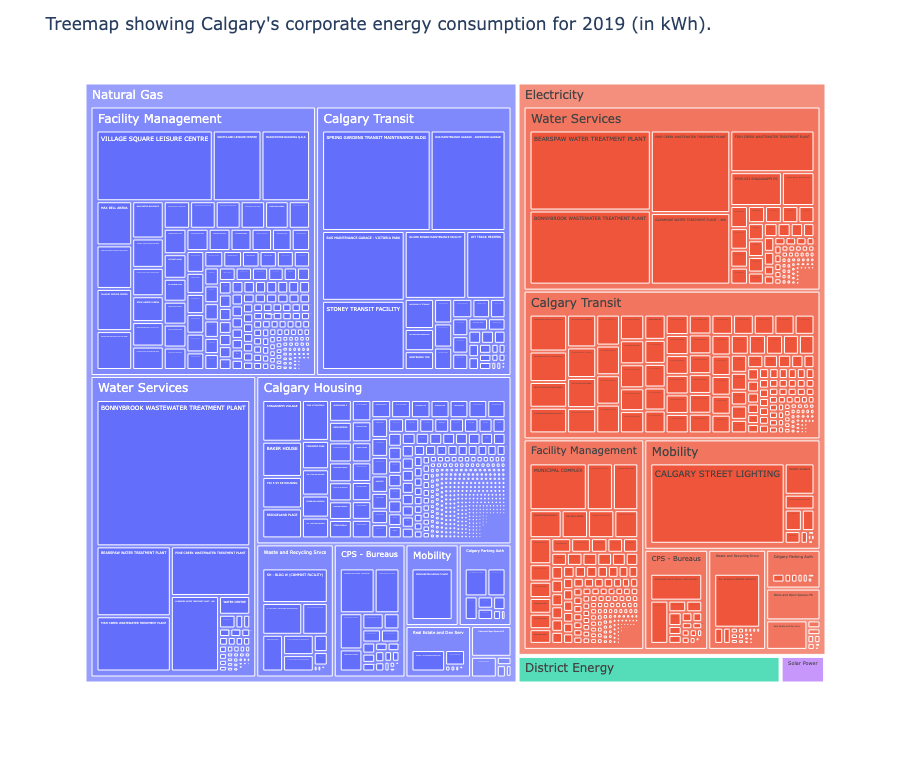

In [10]:
# BEGIN SOLUTION
fig = px.treemap(df, path=['Energy Description', 'Business Unit Desc', 'FacilityName'], values='Total Consumption')
fig.update_layout(
    autosize=False,
    width=1024,
    height=768,
    title='Treemap showing Calgary\'s corporate energy consumption for 2019 (in kWh).'
)
fig.show()
# END SOLUTION

_Please provide your code for the sunburst chart in the cell below._

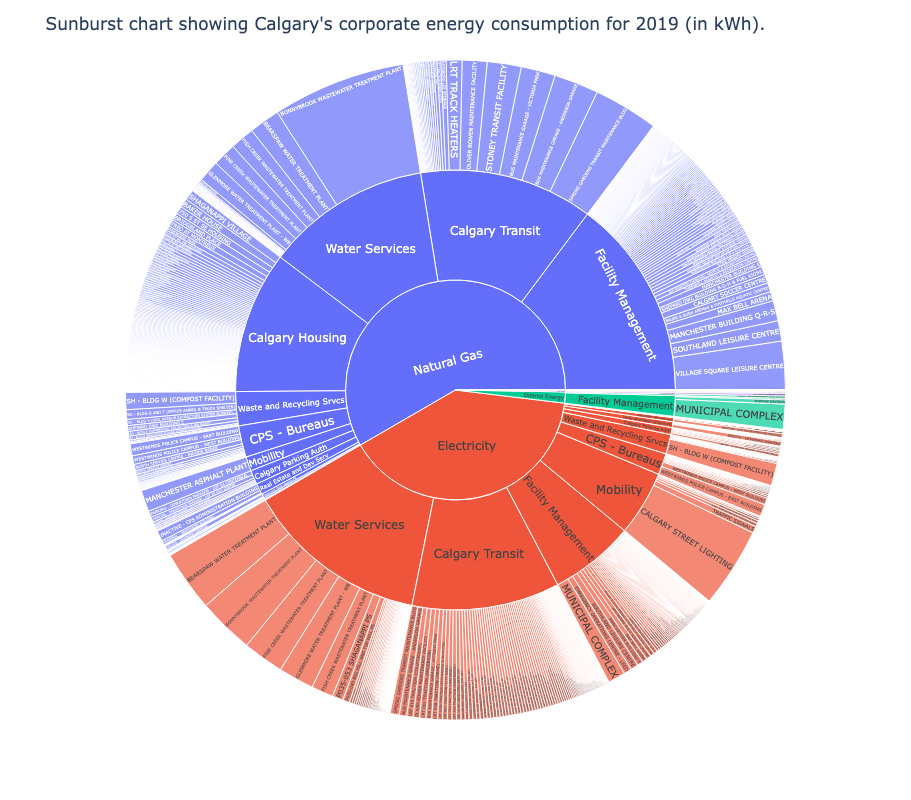

In [11]:
# BEGIN SOLUTION
fig = px.sunburst(df, path=['Energy Description', 'Business Unit Desc', 'FacilityName'], values='Total Consumption')
fig.update_layout(
    autosize=False,
    title='Sunburst chart showing Calgary\'s corporate energy consumption for 2019 (in kWh).',
    width=800,
    height=800,
)
fig.show()
# END SOLUTION

<!-- END QUESTION -->

